Library

In [128]:
import tensorflow as tf
import pandas as pd
import numpy as np
# import tensorflow_datasets as tfds
import os
import zipfile
import shutil
import random
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
from shutil import copyfile

Load Data

In [106]:
directory = './vegetables'

In [107]:

local_zip='./data.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')

zip_ref.close()

In [108]:

try:
    os.rename('train', 'vegetables')
except:
    directory = "vegetables"
    
    # Parent Directory 
    parent = "./"
    
    # Path 
    path = os.path.join(parent, directory) 
    shutil.rmtree(path)
    os.rename('train', 'vegetables')

Data Exploration

In [109]:
list_directory=os.listdir('./vegetables/')
print(list_directory)

['bayam', 'brokoli', 'buncis', 'kale', 'kangkung', 'kates', 'kubis', 'pare', 'Peterseli', 'sawi', 'selada', 'seledri', 'singkong', 'terong', 'timun', 'tomat', 'wortel']


In [110]:

image_directory='./vegetables/'

for  item in list_directory:
  class_dir = os.path.join(image_directory,item)
  print(item ," : ",len(os.listdir(class_dir)),"images")

bayam  :  150 images
brokoli  :  150 images
buncis  :  150 images
kale  :  150 images
kangkung  :  150 images
kates  :  150 images
kubis  :  150 images
pare  :  150 images
Peterseli  :  150 images
sawi  :  150 images
selada  :  150 images
seledri  :  150 images
singkong  :  150 images
terong  :  150 images
timun  :  150 images
tomat  :  150 images
wortel  :  150 images


bayam


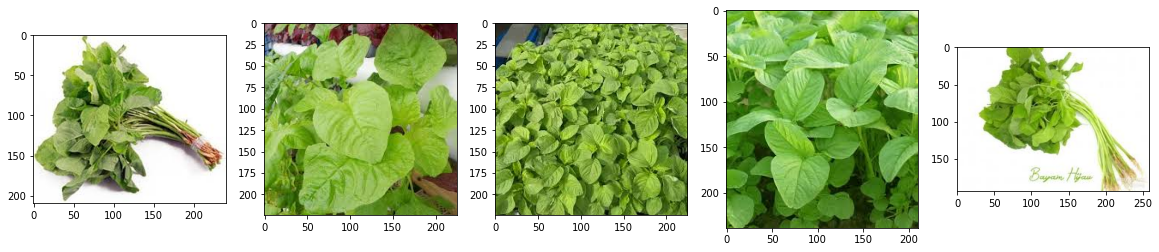

brokoli


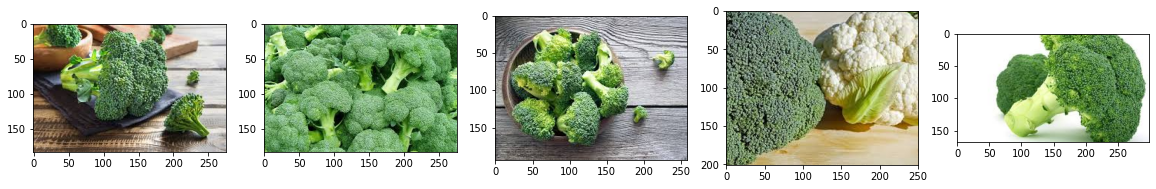

buncis


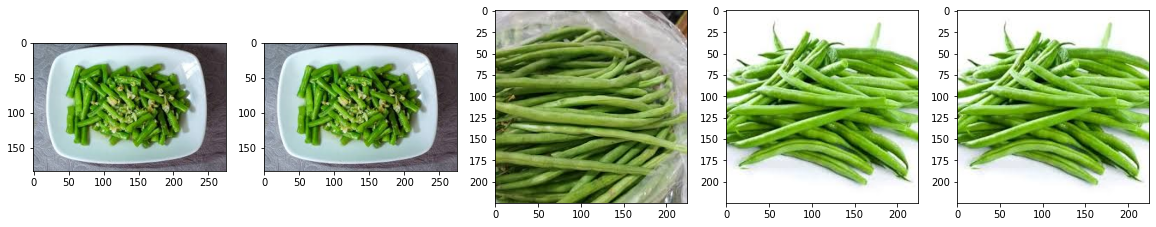

kale


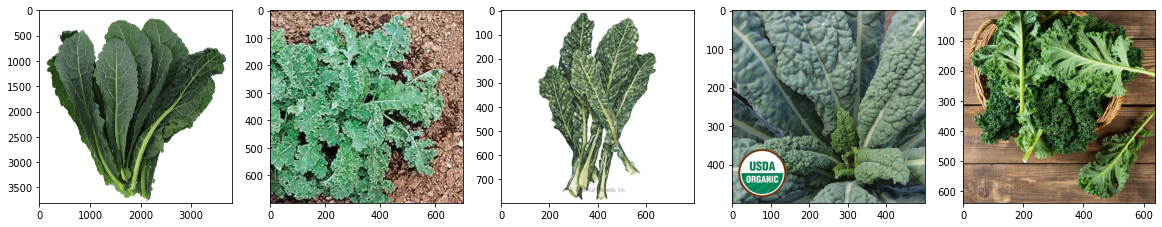

kangkung


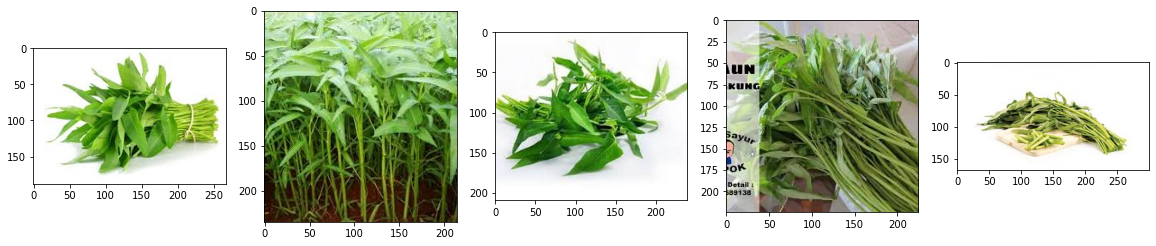

kates


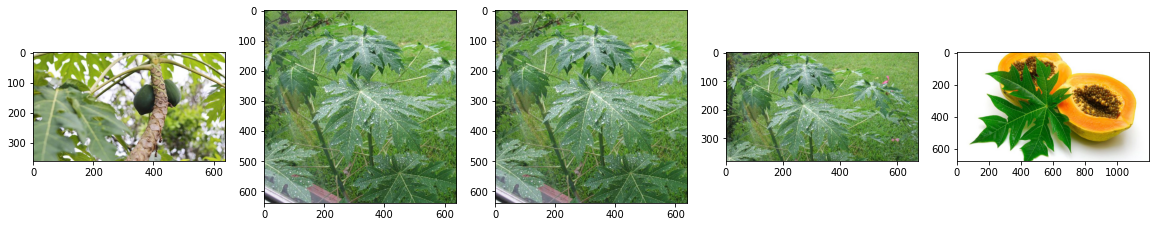

kubis


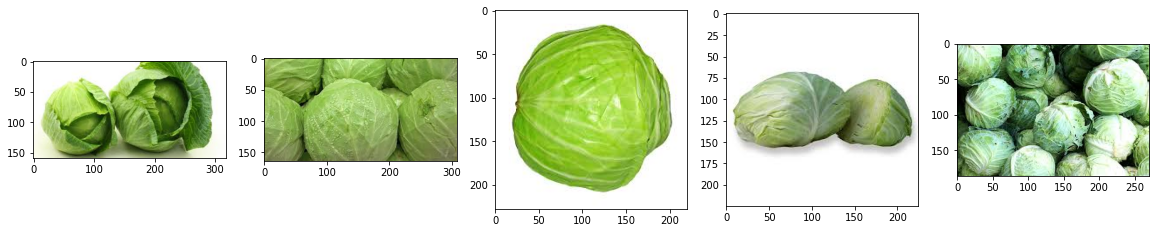

pare


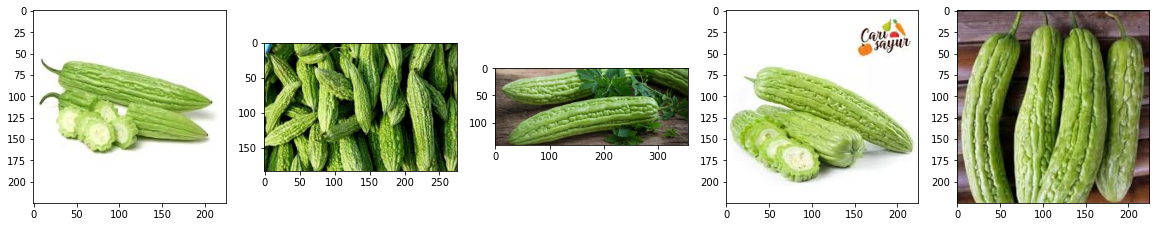

Peterseli


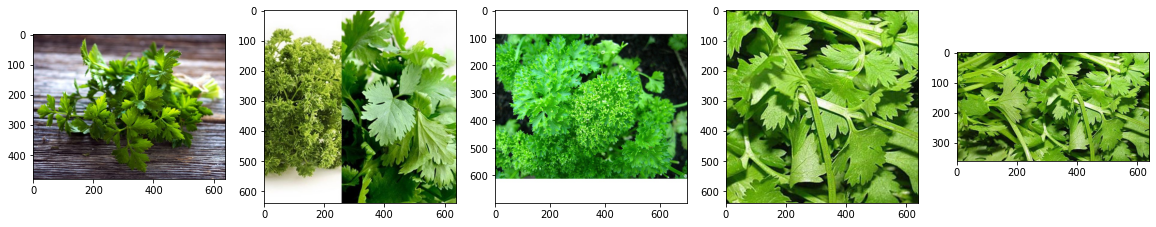

sawi


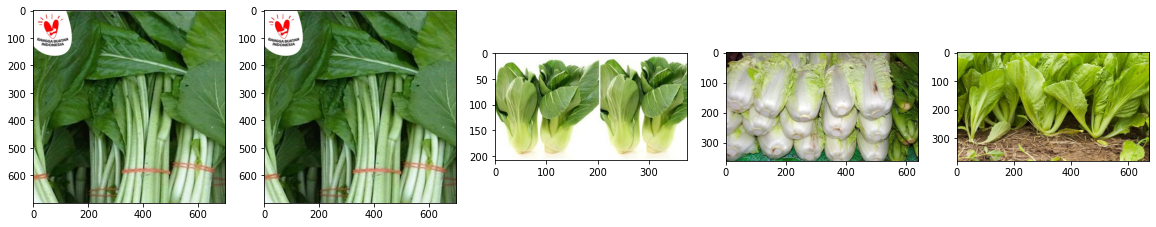

selada


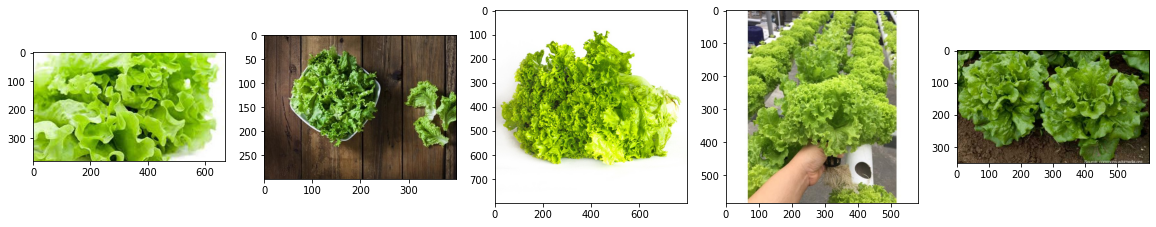

seledri


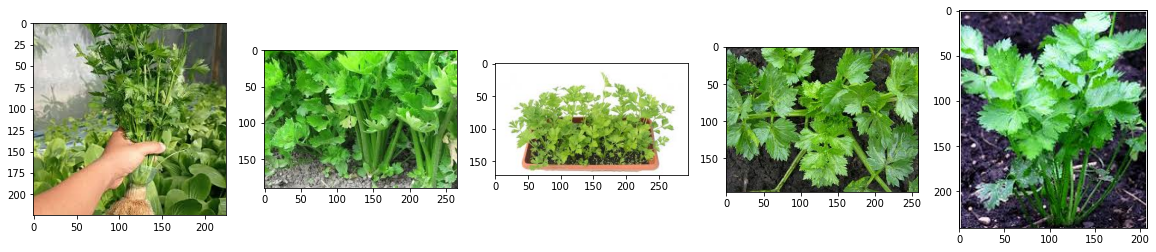

singkong


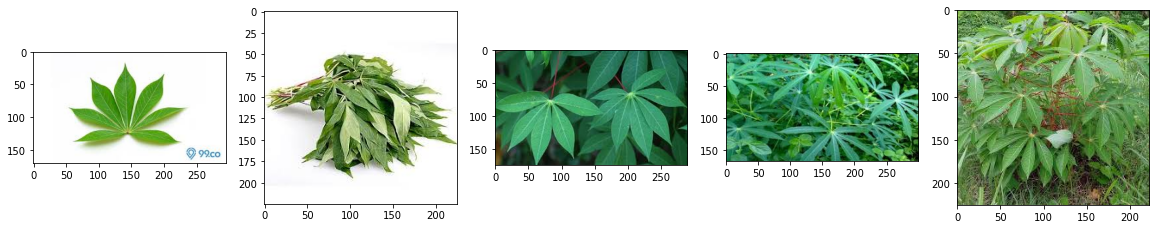

terong


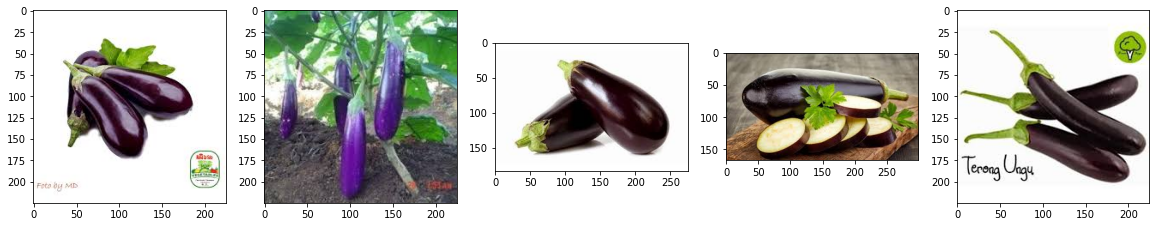

timun


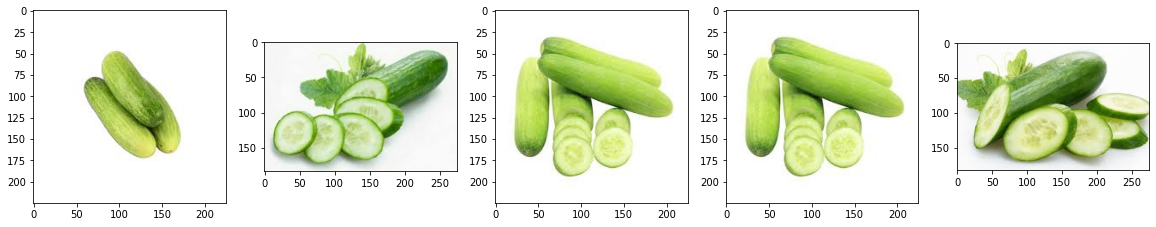

tomat


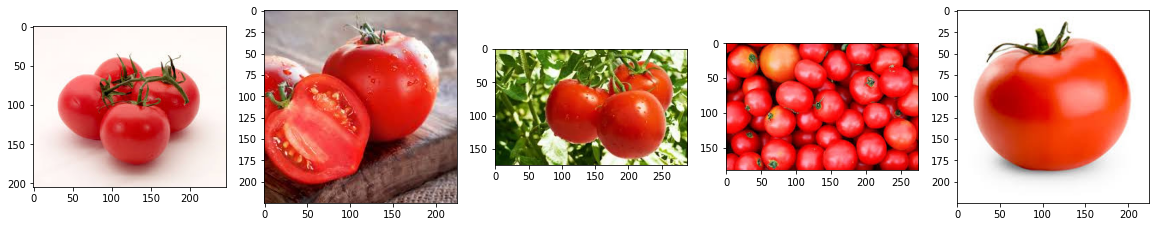

wortel


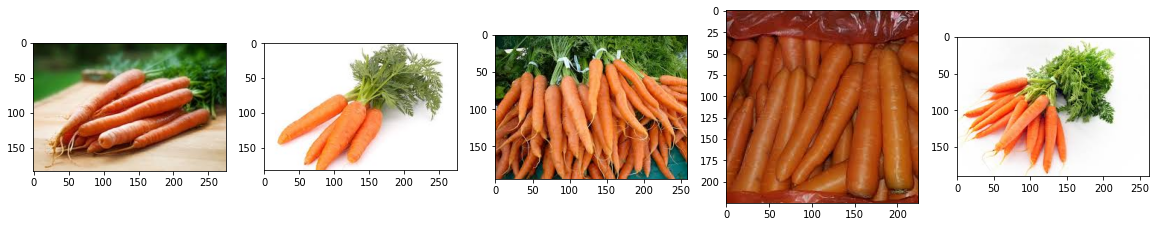

In [111]:
#checking image on directory
for  images in list_directory:
  print(images)
  class_dir = os.path.join(image_directory,images)
  class_images = os.listdir(class_dir)
  plt.figure(figsize=(20, 4))
  for i, img_path in enumerate(class_images[:5]):
    sp = plt.subplot(1, 5, i+1)
    img = mpimg.imread(os.path.join(class_dir, img_path))
    plt.imshow(img)
  plt.show()

Split Train Data

In [115]:
root_dir = './vegetables_data'


# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

#create training and testing directory
def create_train_and_test_dir(root_path):
    
    train='training'
    tes='testing'
  #CREATE SUB OF ROOT DIRECTORY
    path_train=os.path.join(root_dir,train)
    path_test=os.path.join(root_dir,tes)
    os.makedirs(path_train)
    os.makedirs(path_test)
    base_train=root_path+'/training/'
    base_test=root_path+'/testing/' 
    for i in list_directory:
        path_training=os.path.join(base_train,i)
        path_test=os.path.join(base_test,i)
        os.makedirs(path_training)
        os.makedirs(path_test)
        
try:
  create_train_and_test_dir(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [116]:
#checking folder in test and train directory
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))



./vegetables_data\testing
./vegetables_data\training
./vegetables_data\testing\bayam
./vegetables_data\testing\brokoli
./vegetables_data\testing\buncis
./vegetables_data\testing\kale
./vegetables_data\testing\kangkung
./vegetables_data\testing\kates
./vegetables_data\testing\kubis
./vegetables_data\testing\pare
./vegetables_data\testing\Peterseli
./vegetables_data\testing\sawi
./vegetables_data\testing\selada
./vegetables_data\testing\seledri
./vegetables_data\testing\singkong
./vegetables_data\testing\terong
./vegetables_data\testing\timun
./vegetables_data\testing\tomat
./vegetables_data\testing\wortel
./vegetables_data\training\bayam
./vegetables_data\training\brokoli
./vegetables_data\training\buncis
./vegetables_data\training\kale
./vegetables_data\training\kangkung
./vegetables_data\training\kates
./vegetables_data\training\kubis
./vegetables_data\training\pare
./vegetables_data\training\Peterseli
./vegetables_data\training\sawi
./vegetables_data\training\selada
./vegetables_data

In [129]:
#splitting and copyng data for testing and training
def data_split(source_data,training_data,testing_data,split_size):
    files=[]
    for filename in os.listdir(source_data):
        file= source_data + filename
        if os.path.getsize(file)>0:
          files.append(filename)
        else:
          print(filename + ' is zero length, so ignoring.')

    training_length=int(len(files)*split_size)
     
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]
    for filename in training_set:
        this_file = source_data + filename
        destination = training_data + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = source_data + filename
        destination = testing_data + filename
        copyfile(this_file, destination)


In [130]:
 # folder source image 


image_source='./vegetables/'
#train_directory 
train_directory='./vegetables_data/training/'
testing_directgory='./vegetables_data/testing/'



#Train Data
for dr in list_directory:
  # print(dr)
  direc = train_directory+dr+'/'
  # print(direc)
  if len(os.listdir(direc)) > 0:
    for file in os.scandir(direc):
      os.remove(file.path)

#Test Data
for dr in list_directory:
  direc2 = testing_directgory+dr+'/'
  if len(os.listdir(direc2)) > 0:
    for file in os.scandir(direc2):
      os.remove(file.path)      


data_split_size=.8

for dat in list_directory:
  test_dir=testing_directgory+dat+'/'
  train_dir=train_directory+dat+'/'
  image_src=image_source+dat+'/'
  data_split(image_src,train_dir,test_dir,data_split_size)

 

In [133]:

#looking for image properties on training directory
training_directory='./vegetables_data/training/'
listdir_train_image=os.listdir(training_directory)
total_train_images=0
for item in listdir_train_image:
    class_dir = os.path.join(training_directory,item)
    sum_total=len(os.listdir(class_dir))
    total_train_images=total_train_images+sum_total
    print("Train",item ," : ",len(os.listdir(class_dir)),"images")
print('total train image: ',total_train_images,"Images")

    
    



Train bayam  :  120 images
Train brokoli  :  120 images
Train buncis  :  120 images
Train kale  :  120 images
Train kangkung  :  120 images
Train kates  :  120 images
Train kubis  :  120 images
Train pare  :  120 images
Train Peterseli  :  120 images
Train sawi  :  120 images
Train selada  :  120 images
Train seledri  :  120 images
Train singkong  :  120 images
Train terong  :  120 images
Train timun  :  120 images
Train tomat  :  120 images
Train wortel  :  120 images
total train image:  2040 Images


In [134]:

#looking for image properties on testing directory
testing_directory='./vegetables_data/testing/'
listdir_test_images=os.listdir(testing_directory)
total_test_images=0
for item in listdir_test_images:
    class_dir=os.path.join(testing_directory,item)
    sum_total=len(os.listdir(class_dir))
    total_test_images=total_test_images+sum_total
    print("Test",item," : ",len(os.listdir(class_dir)),"images")
print('total test image: ',total_test_images,"Images")

    



Test bayam  :  30 images
Test brokoli  :  30 images
Test buncis  :  30 images
Test kale  :  30 images
Test kangkung  :  30 images
Test kates  :  30 images
Test kubis  :  30 images
Test pare  :  30 images
Test Peterseli  :  30 images
Test sawi  :  30 images
Test selada  :  30 images
Test seledri  :  30 images
Test singkong  :  30 images
Test terong  :  30 images
Test timun  :  30 images
Test tomat  :  30 images
Test wortel  :  30 images
total test image:  510 Images


Library for Model

In [135]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D



In [136]:
# GRADED FUNCTION: train_val_generators
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
  ### START CODE HERE

  # Instantiate the ImageDataGenerator class (don't forget to set the arguments to augment the images)
  train_datagen = ImageDataGenerator(rescale=1.0/255.,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     fill_mode='nearest')

  # Pass in the appropriate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=100,
                                                      class_mode='binary',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale=1.0/255.)

  # Pass in the appropriate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=100,
                                                                class_mode='binary',
                                                                target_size=(150, 150))
  ### END CODE HERE
  return train_generator, validation_generator

In [137]:
# Test your generators
train_generator, validation_generator = train_val_generators(train_directory, testing_directgory)

Found 2038 images belonging to 17 classes.
Found 510 images belonging to 17 classes.


In [138]:
def create_model():
  # DEFINE A KERAS MODEL TO CLASSIFY CATS V DOGS
  # USE AT LEAST 3 CONVOLUTION LAYERS

  ### START CODE HERE

  model = tf.keras.models.Sequential([ 
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
                loss='binary_crossentropy',
                metrics=['accuracy']) 
    
  ### END CODE HERE

  return model

In [139]:
# Get the untrained model
model = create_model()

# Train the model
# Note that this may take some time.
history = model.fit(train_generator,
                    epochs=15,
                    verbose=1,
                    validation_data=validation_generator)

C:\Users\bryli\AppData\Roaming\Python\Python37\site-packages\keras\optimizer_v2\rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/15
21/21 [==============================] - 34s 2s/step - loss: -2434509.0000 - accuracy: 0.0594 - val_loss: -12897659.0000 - val_accuracy: 0.0588
Epoch 2/15
21/21 [==============================] - 25s 1s/step - loss: -61728892.0000 - accuracy: 0.0589 - val_loss: -150118240.0000 - val_accuracy: 0.0588
Epoch 3/15
21/21 [==============================] - 26s 1s/step - loss: -335403296.0000 - accuracy: 0.0589 - val_loss: -617555904.0000 - val_accuracy: 0.0588
Epoch 4/15
21/21 [==============================] - 26s 1s/step - loss: -1084243968.0000 - accuracy: 0.0589 - val_loss: -1724944384.0000 - val_accuracy: 0.0588
Epoch 5/15
21/21 [==============================] - 25s 1s/step - loss: -2687452416.0000 - accuracy: 0.0589 - val_loss: -3907872256.0000 - val_accuracy: 0.0588
Epoch 6/15
21/21 [==============================] - 27s 1s/step - loss: -5656177152.0000 - accuracy: 0.0589 - val_loss: -7739753984.0000 - val_accuracy: 0.0588
Epoch 7/15
21/21 [==============================] 